In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
sns.set_theme()

In [2]:
raw_data = pd.read_csv("2020-2022vs2019_Seated_Diner_Data.csv").transpose()
display(raw_data[77].head())
cambridge = raw_data[77].dropna().iloc[1:]
cambridge.index = pd.to_datetime(cambridge.index)
cambridge = cambridge.apply(lambda per: float(per[:-1]))
cambridge

Unnamed: 0    Cambridge (US)
2020/2/18                NaN
2020/2/19                NaN
2020/2/20                NaN
2020/2/21                NaN
Name: 77, dtype: object

2020-11-09   -87.20
2020-11-10   -78.64
2020-11-11   -83.52
2020-11-12   -85.86
2020-11-13   -80.35
              ...  
2022-02-19   -30.50
2022-02-20   -21.44
2022-02-21   -18.99
2022-02-22   -58.85
2022-02-23   -35.84
Name: 77, Length: 470, dtype: float64

In [3]:
def plot_series(data, title, ylabel):
    plt.figure(figsize=(15,5))
    ax = sns.lineplot(data=data)
    ax.set_title(title)
    ax.set(ylabel=ylabel)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')
    plt.show()

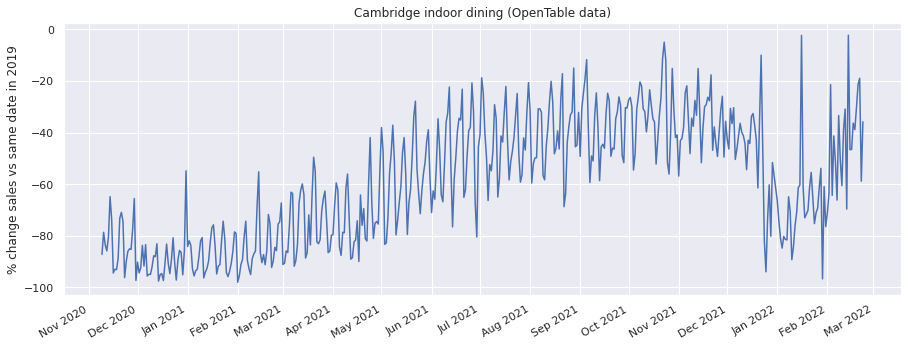

In [4]:
plot_series(cambridge, "Cambridge indoor dining (OpenTable data)", ylabel="% change sales vs same date in 2019")

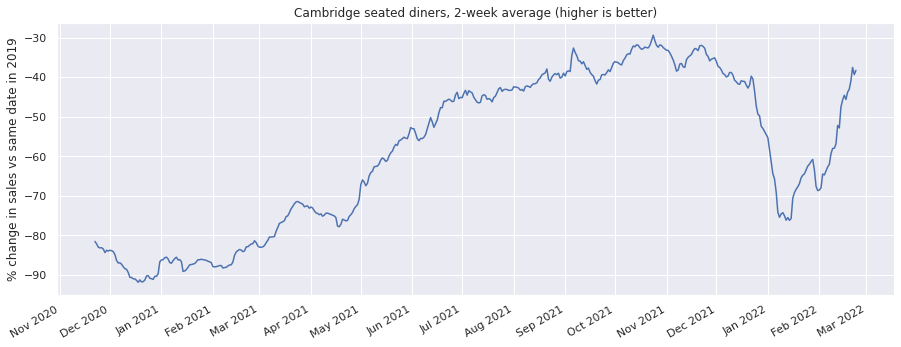

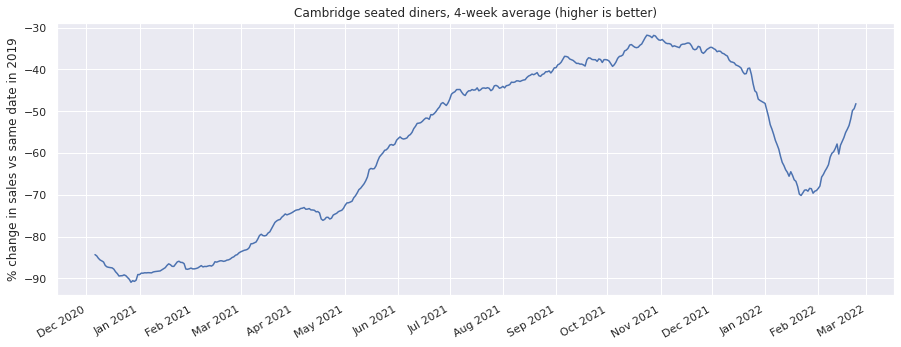

In [5]:
cambridge_14dayaverage = cambridge.rolling(window=14).mean()
plot_series(cambridge_14dayaverage, "Cambridge seated diners, 2-week average (higher is better)", ylabel="% change in sales vs same date in 2019")
cambridge_28dayaverage = cambridge.rolling(window=28).mean()
plot_series(cambridge_28dayaverage, "Cambridge seated diners, 4-week average (higher is better)", ylabel="% change in sales vs same date in 2019")

In [6]:
covid_cases = pd.read_csv("ma-covid-cases.csv", parse_dates=["Date"])
covid_cases = covid_cases.set_index("Date")

new_covid_cases = (covid_cases["Positive New"] + covid_cases["Probable New"]).dropna()

# Same starting date as restaurant data:
new_covid_cases = new_covid_cases.iloc[68:]
display(new_covid_cases)

# Fill in missing dates (e.g. weekends) with zeros:
complete_index = pd.date_range(new_covid_cases.index.values[0], new_covid_cases.index.values[-1])
new_covid_cases = new_covid_cases.reindex(complete_index, fill_value=0)

new_covid_cases

Date
2020-11-09    1328.0
2020-11-10    2154.0
2020-11-11    2660.0
2020-11-12    2648.0
2020-11-13    2906.0
               ...  
2022-02-17    2663.0
2022-02-18    2131.0
2022-02-22    4380.0
2022-02-23    1036.0
2022-02-24    1620.0
Length: 393, dtype: float64

2020-11-09    1328.0
2020-11-10    2154.0
2020-11-11    2660.0
2020-11-12    2648.0
2020-11-13    2906.0
               ...  
2022-02-20       0.0
2022-02-21       0.0
2022-02-22    4380.0
2022-02-23    1036.0
2022-02-24    1620.0
Freq: D, Length: 473, dtype: float64

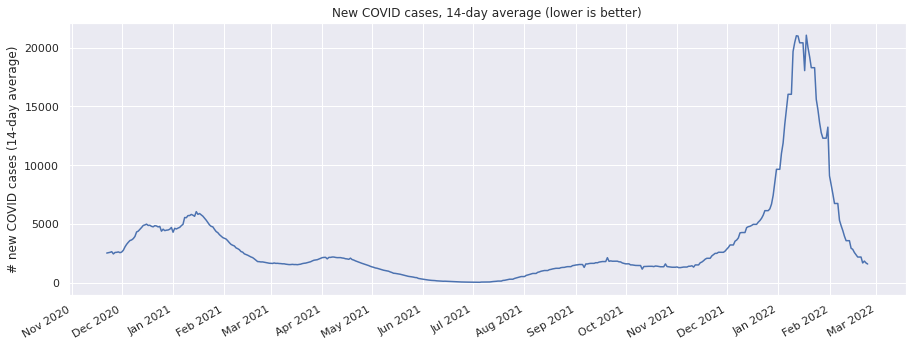

In [7]:
new_covid_14dayaverage = new_covid_cases.rolling(window=14).mean()
plot_series(new_covid_14dayaverage, "New COVID cases, 14-day average (lower is better)", ylabel="# new COVID cases (14-day average)")

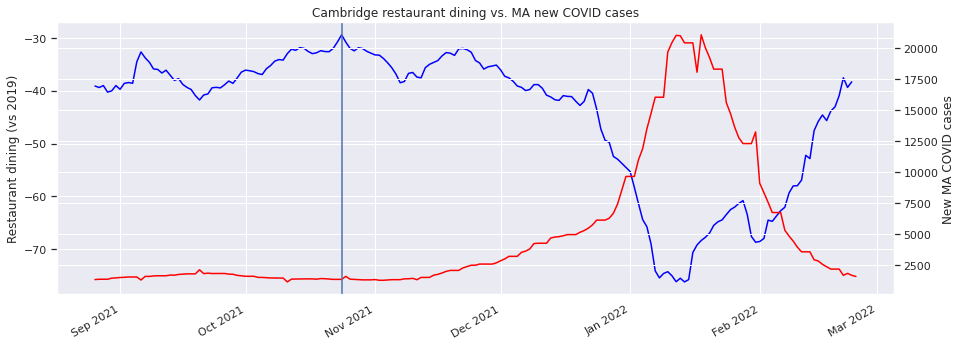

In [8]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(data=cambridge_14dayaverage.iloc[290:], color="blue")
ax2 = sns.lineplot(data=new_covid_14dayaverage.iloc[290:], ax=ax.twinx(), color="red")
ax.set_title("Cambridge restaurant dining vs. MA new COVID cases")
ax.set(ylabel="Restaurant dining (vs 2019)")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
ax2.set(ylabel="New MA COVID cases")
ax.xaxis.set_major_locator(mdates.MonthLocator())
from datetime import datetime
plt.axvline(x=datetime(2021, 10, 24))
plt.show()

In [10]:
print(new_covid_14dayaverage[datetime(2021,11,1)])
print(new_covid_14dayaverage[datetime(2021,12,1)])

1352.0
2864.3571428571427
